### MOVIE RECOMMENDER SYSTEMS

#### Overview

suggestion 2
This project aims to build a Movie Recommender System using the MovieLens dataset, which provides rich information on user preferences and movie metadata. The goal is to develop a system that can suggest movies tailored to individual users by leveraging both user behavior and movie content.

suggestion 3
The MovieLens Beliefs Dataset expands on standard movie ratings and recommendations by including users' stated expectations ("beliefs") about movies they haven't seen. Collected between March 2023 and May 2024 from users who responded to a specific MovieLens homepage feature, the dataset comprises movie information, user rating history, the set of movies used for belief elicitation, user recommendation history, and the core belief data (predicted ratings, certainty, etc.).The goal is to provide researchers with rich pre-consumption data to better understand user behavior and improve recommender systems.

suggestion 4
This project focuses on building a movie recommendation engine that leverages both user-based collaborative filtering and content-based filtering. The goal is to analyze user behavior—such as movie ratings—and recommend movies they are likely to enjoy. For example, if a user enjoys a particular genre, similar movies from that genre may be suggested. By combining collaborative filtering (which finds similar users) with content-based filtering (which analyzes movie genres and features), the system

## OBJECTIVES

Understand how users form beliefs about movies they haven't seen.

Investigate the relationship between user beliefs, past ratings, and received recommendations.

Evaluate how well recommendation systems align with and influence user beliefs.

Potentially improve recommendation algorithms by incorporating belief data.

Study user decision-making processes in the context of movie consumption.

Develop new metrics for evaluating recommender systems based on user beliefs.


###### Business Questions

How do users form beliefs or expectations about movies they haven’t watched yet?

What factors (e.g., genres, tags, ratings, recommendations) most influence these beliefs?

How closely do user beliefs align with their actual ratings after watching a movie?

How do past user ratings and behaviors affect the relevance of future recommendations?

To what extent do recommendations influence or shape user expectations and decisions?

#### Data Understanding

The data used in this project will be pulled from 4 different separate file:

1.Movies Data (movies.csv):

Contains movie information, including titles and genres.
movieId: Unique identifier for each movie.
title: The title of the movie, which also includes the year of release in parentheses.
genres: A pipe-separated list of genres to categorize the movie (e.g., Action|Adventure|Comedy).

2.Links Data (links.csv):

Provides identifiers for linking to external movie-related sources (IMDb, TMDb).
movieId: Unique identifier for each movie, consistent with other data files.
imdbId: Identifier for movies used by IMDb (Internet Movie Database).
tmdbId: Identifier for movies used by TMDb (The Movie Database).

3.Ratings Data (ratings.csv):

Each entry represents a user's rating for a specific movie.
Contains user ratings on a 5-star scale for movies.
userId: ID representing the unique identifier for each user.
movieId: Unique identifier for each movie.
rating: User's rating for the movie on a 5-star scale with half-star increments (0.5 to 5.0).
timestamp: The timestamp when the rating was recorded, represented in seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

4.Tags Data (tags.csv):

Contains user-generated metadata (tags) about movies.
userId: ID representing the unique identifier for each user.
movieId: Unique identifier for each movie.
tag: User-generated metadata describing a movie, typically a single word or short phrase.
timestamp: The timestamp when the tag was applied, represented in seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

In [1]:
#importing the neccesary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
#loading the datasets
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')
links = pd.read_csv('links.csv')

In [3]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [4]:
#merging datasets
df = movies.merge(ratings, on='movieId', how='left').merge(tags, on=['movieId', 'userId'], how='left',
    suffixes=('_rating', '_tag')).merge(links,on='movieId',how='left')

In [5]:
df.shape

(102695, 10)

In [6]:
df.head()

,movieId,title,genres,userId,rating,timestamp_rating,tag,timestamp_tag,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,9.649827e+08,NaN,NaN,114709,862.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,8.474350e+08,NaN,NaN,114709,862.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7.0,4.5,1.106636e+09,NaN,NaN,114709,862.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15.0,2.5,1.510578e+09,NaN,NaN,114709,862.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17.0,4.5,1.305696e+09,NaN,NaN,114709,862.0


In [7]:
df.shape

(102695, 10)

In [8]:
df.columns

Index(['movieId', 'title', 'genres', 'userId', 'rating', 'timestamp_rating',
       'tag', 'timestamp_tag', 'imdbId', 'tmdbId'],
      dtype='object')

### Data Cleaning

Handling missing values

In [9]:
#checking missing values
df.isnull().sum()

movieId                 0
title                   0
genres                  0
userId                 18
rating                 18
timestamp_rating       18
tag                 99219
timestamp_tag       99219
imdbId                  0
tmdbId                 13
dtype: int64

In [10]:
#percentage of null values
null_percent = (df.isnull().sum() / len(df)) * 100
print(null_percent)

movieId              0.000000
title                0.000000
genres               0.000000
userId               0.017528
rating               0.017528
timestamp_rating     0.017528
tag                 96.615220
timestamp_tag       96.615220
imdbId               0.000000
tmdbId               0.012659
dtype: float64


In [11]:
#replacing missing value for 'timestamp_tag'and'tag'
df['timestamp_tag'].fillna(df['timestamp_tag'].mean(), inplace=True)
df['tag'].fillna('unknown', inplace=True)


In [12]:
#dropping missing values'userId','userId','rating','timestamp_rating'and'tmdbId'
df.dropna(subset= ['userId','userId','rating','timestamp_rating','tmdbId'],inplace=True)

In [13]:
 
time_filtered_df = df[df['timestamp_rating'].notnull() & df['timestamp_tag'].notnull()]

In [14]:
#
df.isnull().sum()

movieId             0
title               0
genres              0
userId              0
rating              0
timestamp_rating    0
tag                 0
timestamp_tag       0
imdbId              0
tmdbId              0
dtype: int64

Handling duplicates

In [15]:
#checking duplicates
df.duplicated().sum()

0

In [16]:
#checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102664 entries, 0 to 102694
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   movieId           102664 non-null  int64  
 1   title             102664 non-null  object 
 2   genres            102664 non-null  object 
 3   userId            102664 non-null  float64
 4   rating            102664 non-null  float64
 5   timestamp_rating  102664 non-null  float64
 6   tag               102664 non-null  object 
 7   timestamp_tag     102664 non-null  float64
 8   imdbId            102664 non-null  int64  
 9   tmdbId            102664 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 8.6+ MB


In [17]:
# Converting user IDs and tmdbId to object data type
df[['userId', 'tmdbId']] = df[['userId', 'tmdbId']].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102664 entries, 0 to 102694
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   movieId           102664 non-null  int64  
 1   title             102664 non-null  object 
 2   genres            102664 non-null  object 
 3   userId            102664 non-null  object 
 4   rating            102664 non-null  float64
 5   timestamp_rating  102664 non-null  float64
 6   tag               102664 non-null  object 
 7   timestamp_tag     102664 non-null  float64
 8   imdbId            102664 non-null  int64  
 9   tmdbId            102664 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 8.6+ MB


### Exploratory Data Analysis (EDA) 

##### Rating Distribution

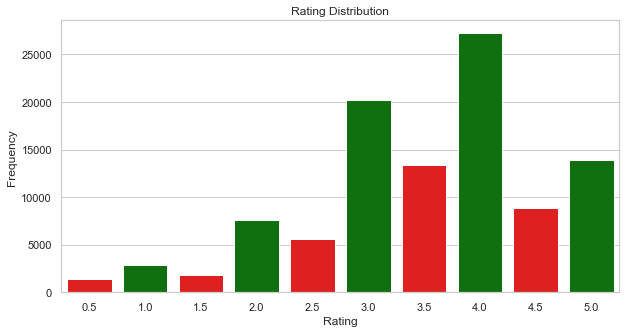

In [18]:
#Rating Distribution
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.countplot(x=df['rating'], palette=['red','green'])
plt.title("Rating Distribution")
plt.xlabel('Rating')
plt.ylabel("Frequency")
plt.show()


##### Rating Distribution by Genre 

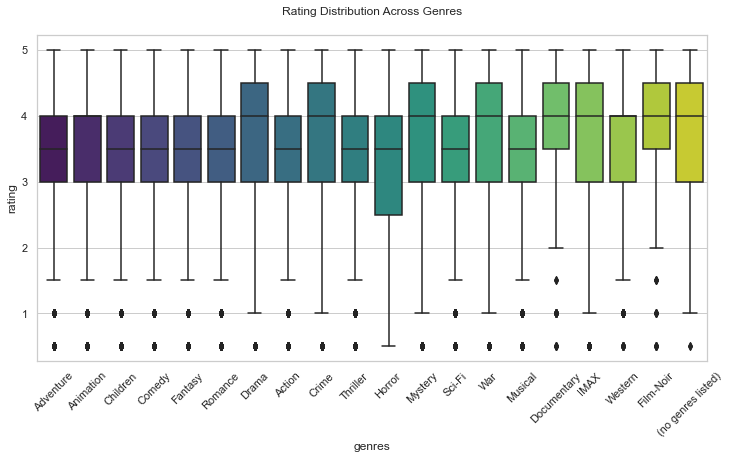

In [19]:
# Rating Distribution by Genre 
df_exploded =df.assign(genres=df['genres'].str.split('|')).explode('genres')

plt.figure(figsize=(12,6))
sns.boxplot(x='genres', y='rating', data=df_exploded, palette='viridis')
plt.title('Rating Distribution Across Genres', pad=20)
plt.xticks(rotation=45)
plt.show()

##### Number of ratings per movie

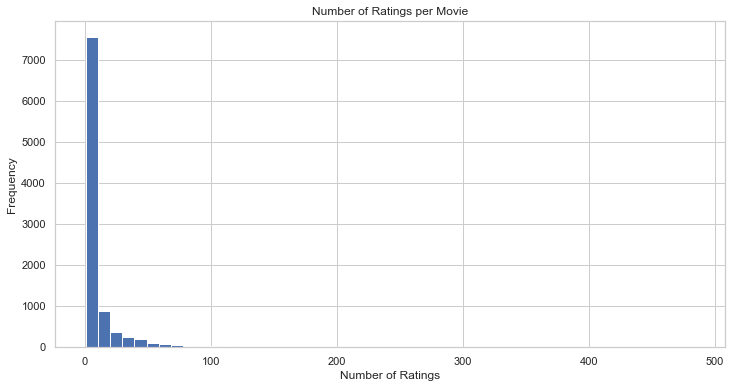

In [20]:
# Number of ratings per movie
ratings_per_movie = df.groupby('movieId')['rating'].count().reset_index()
plt.figure(figsize=(12, 6))
plt.hist(ratings_per_movie['rating'], bins=50)
plt.title('Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

##### Number of ratings over time

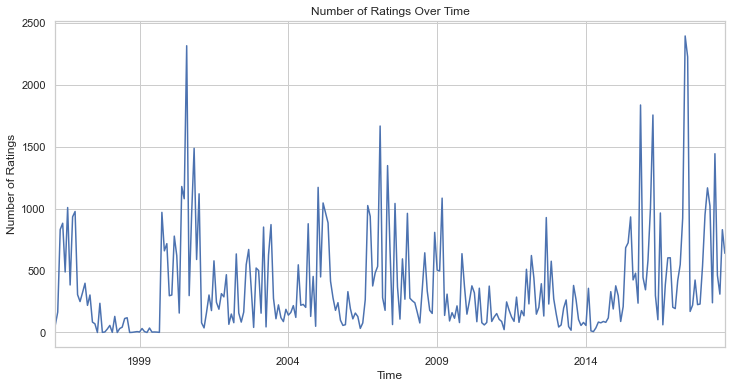

In [21]:
df['timestamp_rating'] = pd.to_datetime(df['timestamp_rating'], unit='s')
# Plot the number of ratings over time (monthly)
plt.figure(figsize=(12, 6))
df.set_index('timestamp_rating').resample('M').size().plot()
plt.title('Number of Ratings Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Ratings')
plt.grid(True)
plt.show()

In [22]:
avg_highly_rated_movies =df.groupby(['title']).agg({"rating":"mean"})['rating'].sort_values(ascending=False)
avg_highly_rated_movies = avg_highly_rated_movies.to_frame()
avg_highly_rated_movies.head(20)

,rating
title,
Goodbye Charlie (1964),5.0
"Valet, The (La doublure) (2006)",5.0
Alien Contamination (1980),5.0
Wonder Woman (2009),5.0
Red Sorghum (Hong gao liang) (1987),5.0
Nasu: Summer in Andalusia (2003),5.0
National Lampoon's Bag Boy (2007),5.0
Lesson Faust (1994),5.0
Reform School Girls (1986),5.0


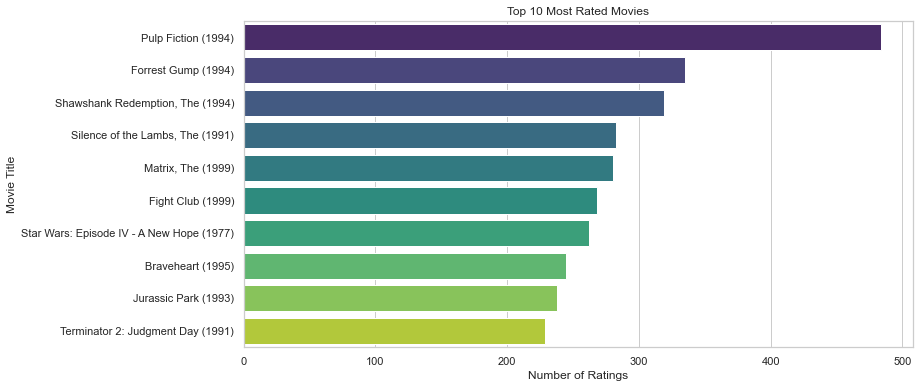

In [28]:
#top N most rated movies.
top_rated_movies = df.groupby('movieId')['rating'].count().sort_values(ascending=False).head(10)
top_rated_movies = pd.merge(top_rated_movies, df[['movieId', 'title']], on='movieId', how='left')
plt.figure(figsize=(12, 6))
sns.barplot(x='rating', y='title', data=top_rated_movies, palette='viridis')
plt.title('Top 10 Most Rated Movies')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.show()

#### Movies counts in each genre

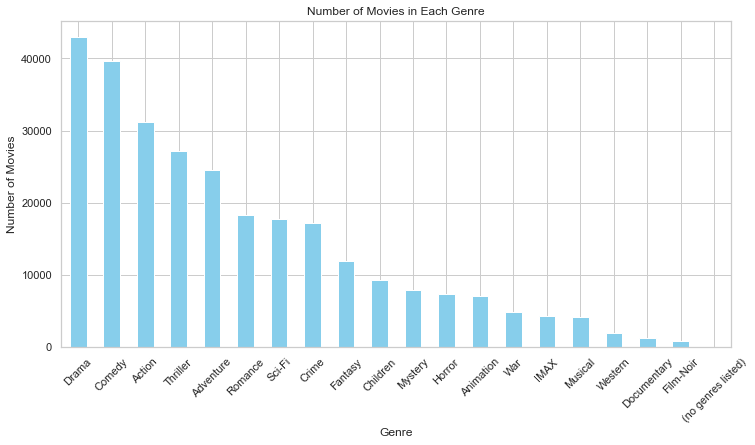

In [25]:
# count of movies in each genre
genre_counts = df['genres'].str.split('|', expand=True).stack().value_counts()
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Movies in Each Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

### MODELLING

The following steps were involved:

1 Selecting Modeling Techniques:

2 Generate Test Design

3 Build Model

4 Feature Selection